In [7]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from qiskit import *

In [9]:
circuit = QuantumCircuit(2,2)

In [10]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

In [11]:
%matplotlib inline

In [15]:
circuit.h(0)
circuit.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
c: 2/═════

In [16]:
circuit.cx(0,1) # 0-> control qubit, 1-> target qubit
circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [17]:
simulator = Aer.get_backend('qasm_simulator')

In [18]:
result = execute(circuit,backend=simulator).result()

In [19]:
from qiskit.visualization import plot_histogram

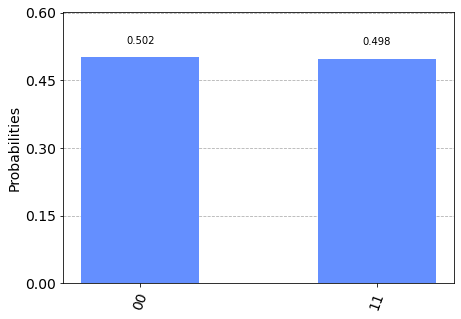

In [20]:
plot_histogram(result.get_counts(circuit))

In [24]:
IBMQ.save_account("eb218f3bd5428e9541607ef892a8df38b2ea3f3769f9c3bb9dfc9649431fbf934a31da05ac8a84dd20f2799dcb8b57d81a80189e3879ffd16df8857765af195e")

In [26]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits ")

ibmq_qasm_simulator : 3 & simulated qubits 
ibmq_lima : 651 & 5 qubits 
ibmq_belem : 197 & 5 qubits 
ibmq_quito : 172 & 5 qubits 
simulator_statevector : 3 & simulated qubits 
simulator_mps : 3 & simulated qubits 
simulator_extended_stabilizer : 3 & simulated qubits 
simulator_stabilizer : 3 & simulated qubits 
ibmq_manila : 154 & 5 qubits 
ibm_nairobi : 518 & 7 qubits 
ibm_oslo : 311 & 7 qubits 


In [28]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [29]:
provider = IBMQ.get_provider("ibm-q")

In [33]:
quantum_computer = provider.get_backend('ibmq_quito')

In [34]:
import qiskit.tools.jupyter
%qiskit_job_watcher

job = execute(circuit,backend=quantum_computer)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [35]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


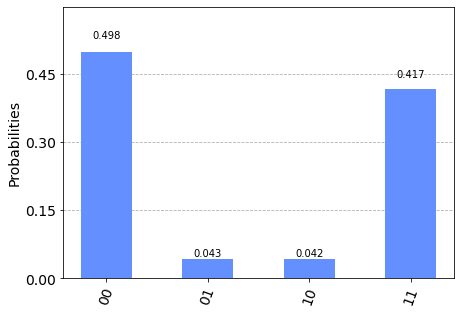

In [36]:
quantum_result = job.result()
plot_histogram(quantum_result.get_counts(circuit))

In [37]:
%qiskit_disable_job_watcher